In [2]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### 1 task

In [4]:
def generate(w, a1, b1, a2, b2, a, b, delta_mu, delta_sigma2, size, rng):
    # генерируем просмотры
    mix = rng.random(size=size) < w
    first = rng.geometric(rng.beta(a1, b1, size=size))
    second = rng.geometric(rng.beta(a2, b2, size=size))
    views = mix * first + (1 - mix) * second

    # генерируем лайки, хитро поменяв параметры a и b
    mu = a/(a+b)*(1+delta_mu)
    variance = (a*b)/((a+b)**2*(a+b+1))*(1+delta_sigma2)
    nu = mu*(1-mu)/variance - 1
    a_new, b_new = mu*nu, (1-mu)*nu
    likes = rng.binomial(views, rng.beta(a_new, b_new, size=size))
    return views, likes


w = 0.25
a1, b1 = 1.4, 4.4
a2, b2 = 3.2, 150
a, b = 1.15, 20.3
rng = np.random.default_rng(0)
delta_mu, delta_sigma2 = 0.1, -0.1
size = 5

print(*generate(w, a1, b1, a2, b2, a, b, delta_mu, delta_sigma2, size, rng), sep='\n')

[187  10   7  16  17]
[28  1  0  0  0]


##### 2 task

In [60]:
from tqdm import tqdm 

def generate(w, a1, b1, a2, b2, a, b, delta_mu, delta_sigma2, size, rng):
    # генерируем просмотры
    mix = rng.random(size=size) < w
    first = rng.geometric(rng.beta(a1, b1, size=size))
    second = rng.geometric(rng.beta(a2, b2, size=size))
    views = mix * first + (1 - mix) * second

    # генерируем лайки, хитро поменяв параметры a и b
    mu = a/(a+b)*(1+delta_mu)
    variance = (a*b)/((a+b)**2*(a+b+1))*(1+delta_sigma2)
    nu = mu*(1-mu)/variance - 1
    a_new, b_new = mu*nu, (1-mu)*nu
    likes = rng.binomial(views, rng.beta(a_new, b_new, size=size))
    return views, likes


size = 10000
alpha = 0.05
N = 10000


counter = 0

for i in tqdm(range(N)):
    views, likes = generate(w = 0.25, a1 = 1.4, b1 = 4.4, a2 = 3.2, b2 = 150, 
                            a = 1.15, b = 20.3, rng = np.random.default_rng(),  
                            delta_mu = 0, delta_sigma2 = 0, size = size)
    control_data =  likes/views

    views, likes = generate(w = 0.25, a1 = 1.4, b1 = 4.4, a2 = 3.2, b2 = 150, 
                            a = 1.15, b = 20.3, rng = np.random.default_rng(),  
                            delta_mu = 0, delta_sigma2 = 0.05, size = size)
    test_data = likes / views

    p_value = ss.mannwhitneyu(control_data, test_data, alternative='two-sided').pvalue
    if (p_value < alpha):
        counter+=1


print(counter/N/alpha)

100%|██████████| 10000/10000 [02:42<00:00, 61.58it/s]

1.432


##### 3 task

In [61]:
from tqdm import tqdm 

def generate(w, a1, b1, a2, b2, a, b, delta_mu, delta_sigma2, size, rng):
    # генерируем просмотры
    mix = rng.random(size=size) < w
    first = rng.geometric(rng.beta(a1, b1, size=size))
    second = rng.geometric(rng.beta(a2, b2, size=size))
    views = mix * first + (1 - mix) * second

    # генерируем лайки, хитро поменяв параметры a и b
    mu = a/(a+b)*(1+delta_mu)
    variance = (a*b)/((a+b)**2*(a+b+1))*(1+delta_sigma2)
    nu = mu*(1-mu)/variance - 1
    a_new, b_new = mu*nu, (1-mu)*nu
    likes = rng.binomial(views, rng.beta(a_new, b_new, size=size))
    return views, likes


size = 10000
alpha = 0.05
N = 10000


counter = 0

for i in tqdm(range(N)):
    views, likes = generate(w = 0.25, a1 = 1.4, b1 = 4.4, a2 = 3.2, b2 = 150, 
                            a = 1.15, b = 20.3, rng = np.random.default_rng(),  
                            delta_mu = 0, delta_sigma2 = 0, size = size)
    control_data =  likes/views

    views, likes = generate(w = 0.25, a1 = 1.4, b1 = 4.4, a2 = 3.2, b2 = 150, 
                            a = 1.15, b = 20.3, rng = np.random.default_rng(),  
                            delta_mu = 0.05, delta_sigma2 = 0, size = size)
    test_data = likes / views

    p_value = ss.mannwhitneyu(control_data, test_data, alternative='two-sided').pvalue
    if (p_value < alpha):
        counter+=1

print(counter/N)

100%|██████████| 10000/10000 [02:48<00:00, 59.29it/s]

0.804


##### 4 task

In [62]:
from tqdm import tqdm 

def generate(w, a1, b1, a2, b2, a, b, delta_mu, delta_sigma2, size, rng):
    # генерируем просмотры
    mix = rng.random(size=size) < w
    first = rng.geometric(rng.beta(a1, b1, size=size))
    second = rng.geometric(rng.beta(a2, b2, size=size))
    views = mix * first + (1 - mix) * second

    # генерируем лайки, хитро поменяв параметры a и b
    mu = a/(a+b)*(1+delta_mu)
    variance = (a*b)/((a+b)**2*(a+b+1))*(1+delta_sigma2)
    nu = mu*(1-mu)/variance - 1
    a_new, b_new = mu*nu, (1-mu)*nu
    likes = rng.binomial(views, rng.beta(a_new, b_new, size=size))
    return views, likes


size = 10000
alpha = 0.05
N = 10000


counter = 0

for i in tqdm(range(N)):
    views, likes = generate(w = 0.25, a1 = 1.4, b1 = 4.4, a2 = 3.2, b2 = 150, 
                            a = 1.15, b = 20.3, rng = np.random.default_rng(),  
                            delta_mu = 0, delta_sigma2 = 0, size = size)
    control_data =  likes/views

    views, likes = generate(w = 0.25, a1 = 1.4, b1 = 4.4, a2 = 3.2, b2 = 150, 
                            a = 1.15, b = 20.3, rng = np.random.default_rng(),  
                            delta_mu = 0.05, delta_sigma2 = 0, size = size)
    test_data = likes / views

    p_value = ss.ttest_ind(control_data, test_data, alternative='two-sided').pvalue
    if (p_value < alpha):
        counter+=1

print(counter/N)

100%|██████████| 10000/10000 [00:56<00:00, 178.20it/s]

0.4655


##### 5 task

In [66]:
def efron_pvalue(A, B, rng):
    # не меняйте код ниже
    A_b = rng.choice(A, size=(10000, len(A)))
    B_b = rng.choice(B, size=(10000, len(B)))
    # используйте бутстраповские выборки выше для вычисления p-value
    delta = np.mean(A_b, axis=1) - np.mean(B_b, axis=1)
    if np.mean(delta > 0) > 0.5:
        p_value = 2 * np.mean(delta <= 0)
    else:
        p_value = 2 * np.mean(delta >= 0)
    return p_value

rng = np.random.default_rng(0)
size_A = rng.integers(30, 100)
size_B = rng.integers(30, 100)
A = rng.normal(size=size_A)
B = rng.normal(size=size_B)

print(efron_pvalue(A, B, np.random.default_rng(0)))

0.1554


##### 6 task

In [11]:
from tqdm import tqdm

def monte_carlo_AB_test():
    num_runs = 10000
    counter = 0
    for _ in tqdm(range(num_runs)):
        rng = np.random.default_rng()
        A = rng.normal(size=100)
        B = rng.normal(size=100)
        p_value = ss.ttest_ind(A, B, equal_var=False, alternative='two-sided').pvalue
        if p_value < 0.05:
            counter += 1
        elif p_value <= 0.15:
            A_add = rng.normal(size=100)
            B_add = rng.normal(size=100)
            A = A + A_add 
            B = B + B_add
            p_value_add = ss.ttest_ind(A, B, equal_var=False, alternative='two-sided').pvalue
            if p_value_add < 0.05:
                counter += 1
    return counter/num_runs

print(monte_carlo_AB_test())

100%|██████████| 10000/10000 [00:06<00:00, 1443.01it/s]

0.0629


##### 7 task

In [14]:
from tqdm import tqdm

def monte_carlo_AB_partial_test():
    num_runs = 10000
    counter = 0
    for _ in tqdm(range(num_runs)):
        A = rng.normal(size=100)
        B = rng.normal(size=100)
        for day in range(10):
            A_part = A[:10*(day+1)]
            B_part = B[:10*(day+1)]
            p_value = ss.ttest_ind(A_part, B_part, equal_var=False, alternative='two-sided').pvalue
            if p_value < 0.05:
                counter += 1
                break
    return counter/num_runs

print(monte_carlo_AB_partial_test())

100%|██████████| 10000/10000 [00:52<00:00, 190.87it/s]

0.1947


##### 8 task

In [75]:
from tqdm import tqdm

def check(delta_0, alpha, beta):
    counter = 0
    true_effect_greater_count = 0
    num_runs = 10000
    true_effect = ss.t.rvs(3, scale = delta_0 * 0.9, size = num_runs)
    sigma_star = delta_0 / (ss.t(3, scale = delta_0 * 0.9).interval(1 - alpha)[1] - ss.norm.ppf(beta))
    for _ in tqdm(range(num_runs)):
        # sample = ss.norm.rvs(true_effect, sigma_star, size=100)        
        confidence_interval = ss.norm.interval(1 - alpha, loc=true_effect[_], scale=sigma_star)
        reject = (confidence_interval[0] > 0) or (confidence_interval[1] < 0)
        true_effect_greater = true_effect[_] > 1
        if reject:
            counter += 1
            if true_effect_greater:
                true_effect_greater_count += 1
    return counter / num_runs, true_effect_greater_count / counter if counter != 0 else 0


print(check(0.5, 0.01, 0.01))

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:02<00:00, 4778.55it/s]

(0.6017, 0.09489778959614426)


In [71]:
alpha = 0.05
beta = 0.2
ss.t(3).interval(1 - alpha)[1] - ss.norm.ppf(beta)
# ss.norm.ppf(0.2)

4.024067538857177

0.12879151190397253

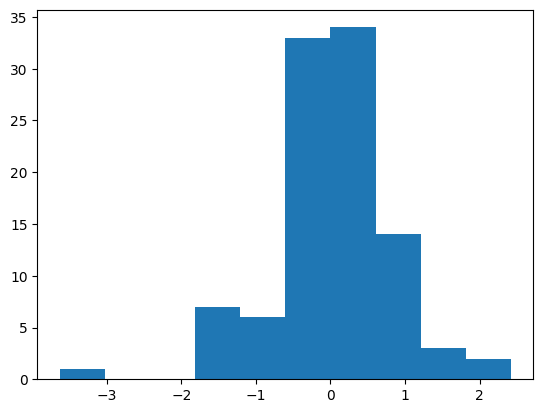

In [30]:
delta_0 = 0.5
plt.hist(ss.t.rvs(3, scale = 0.9*delta_0, size = 100))
np.mean(ss.t.rvs(3, scale = 0.9*delta_0, size = 100))